In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

In [2]:
y_df=pd.read_csv('common_data.csv')

In [3]:
daily_df=pd.read_csv('daily_observations.csv')

In [4]:
y_df.head()

,adm2_code,adm1_code,year,yield,area_harvested_obs,phen_gup,phen_dor
0,US01031,US01,2003,123.0,5500.0,72,295
1,US01031,US01,2004,111.0,6900.0,72,295
2,US01031,US01,2005,127.0,6000.0,72,295
3,US01031,US01,2006,85.0,5600.0,72,295
4,US01031,US01,2007,73.0,8300.0,72,295


In [5]:
y_df.describe()

,year,yield,area_harvested_obs,phen_gup,phen_dor
count,19134.000000,17842.000000,17842.000000,19134.000000,19134.000000
mean,2010.403366,143.677267,63626.218473,109.769572,291.260845
std,4.622965,36.093977,58553.730991,23.705447,15.442627
min,2003.000000,10.400000,5050.000000,47.000000,226.000000
25%,2006.000000,122.000000,18200.000000,91.000000,282.000000
50%,2010.000000,147.400000,44000.000000,111.000000,289.000000
75%,2014.000000,169.900000,91100.000000,128.000000,299.000000
max,2018.000000,255.400000,394000.000000,156.000000,337.000000


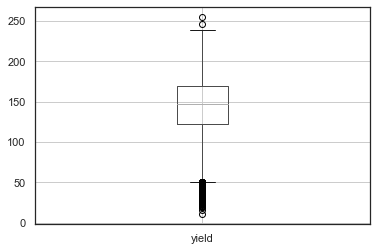

In [6]:
#y_df[y_df['year']!= 2018].boxplot(column=['year','yield','phen_gup','phen_dor'])
y_df[y_df['year']!= 2018].boxplot(column=['yield'])

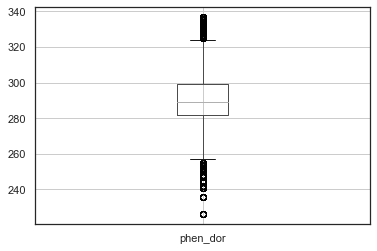

In [7]:
y_df[y_df['year']!= 2018].boxplot(column=['phen_dor'])

Had a quick look into the data as to why there are possible outliers in these fields.
It does not appear to be outliers for the phen_dor field since all the values seem to be for the same county.
It might be possible due to geographic locations

In [8]:
y_df[y_df['yield']<=50]['year'].value_counts()

2012    99
2011    53
2006    27
2003    25
2008    20
2010    15
2009    13
2007     7
2013     3
2004     3
2015     2
2017     1
2016     1
2014     1
Name: year, dtype: int64

In [9]:
y_df[y_df['yield']<=50]['adm1_code'].value_counts()

US48    57
US20    43
US29    36
US46    28
US17    19
US37    16
US51    14
US21    11
US45    10
US40     9
US08     7
US38     7
US47     4
US18     4
US24     3
US19     1
US26     1
Name: adm1_code, dtype: int64

The low values in the yields might not be outliers since the values are mostly concentrated in a few regions
and years. There might be something special abotu those years and counties.

In [10]:
cor_df=y_df[y_df['year']!= 2018].corr()

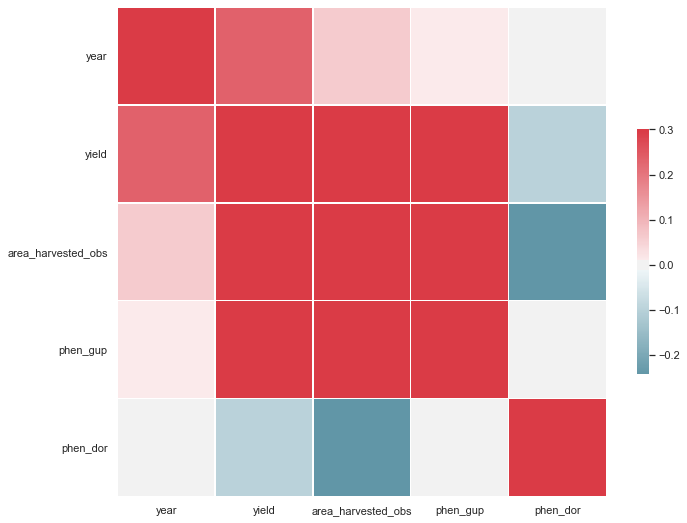

In [11]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap 
sns.heatmap(cor_df, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [12]:
daily_df.head()

,adm2_code,year,date,doy,met_avg_t,met_extreme_cold,met_extreme_hot1,met_extreme_hot2,met_gdd,met_max_rh,...,mod_lst_day,mod_lst_night,mod_nbar_1,mod_nbar_2,mod_nbar_3,mod_nbar_4,mod_nbar_5,mod_nbar_6,mod_nbar_7,mod_ndvi
0,US01031,2003,2003-01-01,1,287.44855,0,0,0,4.298554,96.77753,...,288.11395,273.58743,0.08692,0.244635,0.03991,0.07201,0.30011,0.259010,0.162760,0.475683
1,US01031,2003,2003-01-02,2,286.61816,0,0,0,5.022919,87.06785,...,288.11395,273.58743,0.08596,0.245240,0.04046,0.07342,0.29704,0.259070,0.159570,0.480918
2,US01031,2003,2003-01-03,3,277.10223,1,0,0,0.000000,88.82168,...,288.11395,273.58743,0.08415,0.245300,0.03945,0.07473,0.29792,0.257964,0.154409,0.489149
3,US01031,2003,2003-01-04,4,276.73196,1,0,0,0.399628,80.37215,...,288.11395,273.58743,0.08143,0.247400,0.03815,0.07355,0.29815,0.257130,0.156588,0.504729
4,US01031,2003,2003-01-05,5,281.21307,1,0,0,3.454437,76.90567,...,288.11395,273.58743,0.08141,0.245780,0.03817,0.07355,0.29834,0.261379,0.157310,0.502369


In [13]:
daily_df.isnull().sum()

adm2_code           0
year                0
date                0
doy                 0
met_avg_t           0
met_extreme_cold    0
met_extreme_hot1    0
met_extreme_hot2    0
met_gdd             0
met_max_rh          0
met_max_t           0
met_max_vpd         0
met_min_rh          0
met_min_t           0
met_p_mm            0
met_sh              0
met_sr_wm2          0
mod_evi             0
mod_lst_day         0
mod_lst_night       0
mod_nbar_1          0
mod_nbar_2          0
mod_nbar_3          0
mod_nbar_4          0
mod_nbar_5          0
mod_nbar_6          0
mod_nbar_7          0
mod_ndvi            0
dtype: int64

In [14]:
m_df=pd.merge(y_df,daily_df,how='outer',on=['adm2_code','year'])

In [15]:
m_df.head()

,adm2_code,adm1_code,year,yield,area_harvested_obs,phen_gup,phen_dor,date,doy,met_avg_t,...,mod_lst_day,mod_lst_night,mod_nbar_1,mod_nbar_2,mod_nbar_3,mod_nbar_4,mod_nbar_5,mod_nbar_6,mod_nbar_7,mod_ndvi
0,US01031,US01,2003,123.0,5500.0,72,295,2003-01-01,1,287.44855,...,288.11395,273.58743,0.08692,0.244635,0.03991,0.07201,0.30011,0.259010,0.162760,0.475683
1,US01031,US01,2003,123.0,5500.0,72,295,2003-01-02,2,286.61816,...,288.11395,273.58743,0.08596,0.245240,0.04046,0.07342,0.29704,0.259070,0.159570,0.480918
2,US01031,US01,2003,123.0,5500.0,72,295,2003-01-03,3,277.10223,...,288.11395,273.58743,0.08415,0.245300,0.03945,0.07473,0.29792,0.257964,0.154409,0.489149
3,US01031,US01,2003,123.0,5500.0,72,295,2003-01-04,4,276.73196,...,288.11395,273.58743,0.08143,0.247400,0.03815,0.07355,0.29815,0.257130,0.156588,0.504729
4,US01031,US01,2003,123.0,5500.0,72,295,2003-01-05,5,281.21307,...,288.11395,273.58743,0.08141,0.245780,0.03817,0.07355,0.29834,0.261379,0.157310,0.502369


In [16]:
yearly_df=pd.read_csv('annual_yields.csv')

In [17]:
yearly_df=yearly_df[yearly_df['year']>=2003]

In [18]:
yearly_df.head(30)

,year,yield
13,2003,142.2
14,2004,160.3
15,2005,147.9
16,2006,149.1
17,2007,150.7
18,2008,153.3
19,2009,164.4
20,2010,152.6
21,2011,146.8
22,2012,123.1


In [19]:
final_raw_df=pd.merge(m_df,yearly_df,how='outer',on=['year'])

In [20]:
final_raw_df.describe()

,year,yield_x,area_harvested_obs,phen_gup,phen_dor,doy,met_avg_t,met_extreme_cold,met_extreme_hot1,met_extreme_hot2,...,mod_lst_night,mod_nbar_1,mod_nbar_2,mod_nbar_3,mod_nbar_4,mod_nbar_5,mod_nbar_6,mod_nbar_7,mod_ndvi,yield_y
count,6.983910e+06,6.512330e+06,6.512330e+06,6.983910e+06,6.983910e+06,6.983910e+06,6.983910e+06,6.983910e+06,6.983910e+06,6.983910e+06,...,6.983910e+06,6.983910e+06,6.983910e+06,6.983910e+06,6.983910e+06,6.983910e+06,6.983910e+06,6.983910e+06,6.983910e+06,6.512330e+06
mean,2.010403e+03,1.436773e+02,6.362622e+04,1.097696e+02,2.912608e+02,1.830000e+02,2.850143e+02,3.174619e-01,3.379081e-02,1.652906e-01,...,2.779050e+02,1.552943e-01,3.248744e-01,1.105317e-01,1.448941e-01,3.227362e-01,2.577586e-01,1.600280e-01,4.264092e-01,1.555165e+02
std,4.622845e+00,3.609297e+01,5.855209e+04,2.370483e+01,1.544222e+01,1.053660e+02,1.096635e+01,4.654888e-01,1.806903e-01,3.714427e-01,...,1.070280e+01,1.783510e-01,1.383987e-01,1.829775e-01,1.780373e-01,5.069307e-02,6.941857e-02,6.609581e-02,2.348863e-01,1.351312e+01
min,2.003000e+03,1.040000e+01,5.050000e+03,4.700000e+01,2.260000e+02,1.000000e+00,2.600000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,2.360097e+02,2.421000e-02,8.766000e-02,1.282000e-02,3.350476e-02,6.252000e-02,1.245000e-02,8.900000e-03,-5.770426e-01,1.231000e+02
25%,2.006000e+03,1.220000e+02,1.820000e+04,9.100000e+01,2.820000e+02,9.200000e+01,2.764899e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,2.703198e+02,7.622000e-02,2.266687e-01,3.860028e-02,7.154067e-02,2.850423e-01,2.228400e-01,1.114810e-01,2.815731e-01,1.479000e+02
50%,2.010000e+03,1.474000e+02,4.400000e+04,1.110000e+02,2.890000e+02,1.830000e+02,2.862092e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,2.785516e+02,1.013600e-01,2.856000e-01,5.085068e-02,8.548000e-02,3.265984e-01,2.612522e-01,1.579900e-01,4.022713e-01,1.533000e+02
75%,2.014000e+03,1.699000e+02,9.110000e+04,1.280000e+02,2.990000e+02,2.740000e+02,2.942930e+02,1.000000e+00,0.000000e+00,0.000000e+00,...,2.870442e+02,1.275800e-01,3.810300e-01,6.392000e-02,1.040414e-01,3.620700e-01,3.034600e-01,2.048500e-01,5.953801e-01,1.684000e+02
max,2.018000e+03,2.554000e+02,3.940000e+05,1.560000e+02,3.370000e+02,3.650000e+02,3.114352e+02,1.000000e+00,1.000000e+00,1.000000e+00,...,3.007958e+02,9.350800e-01,8.866561e-01,9.326400e-01,9.441900e-01,5.293790e-01,4.824700e-01,4.195400e-01,9.147236e-01,1.766000e+02


In [22]:
final_raw_df[final_raw_df['year']==2018].isnull().sum()

adm2_code                  0
adm1_code                  0
year                       0
yield_x               471580
area_harvested_obs    471580
phen_gup                   0
phen_dor                   0
date                       0
doy                        0
met_avg_t                  0
met_extreme_cold           0
met_extreme_hot1           0
met_extreme_hot2           0
met_gdd                    0
met_max_rh                 0
met_max_t                  0
met_max_vpd                0
met_min_rh                 0
met_min_t                  0
met_p_mm                   0
met_sh                     0
met_sr_wm2                 0
mod_evi                    0
mod_lst_day                0
mod_lst_night              0
mod_nbar_1                 0
mod_nbar_2                 0
mod_nbar_3                 0
mod_nbar_4                 0
mod_nbar_5                 0
mod_nbar_6                 0
mod_nbar_7                 0
mod_ndvi                   0
yield_y               471580
dtype: int64

In [23]:
final_raw_df.columns

Index(['adm2_code', 'adm1_code', 'year', 'yield_x', 'area_harvested_obs',
       'phen_gup', 'phen_dor', 'date', 'doy', 'met_avg_t', 'met_extreme_cold',
       'met_extreme_hot1', 'met_extreme_hot2', 'met_gdd', 'met_max_rh',
       'met_max_t', 'met_max_vpd', 'met_min_rh', 'met_min_t', 'met_p_mm',
       'met_sh', 'met_sr_wm2', 'mod_evi', 'mod_lst_day', 'mod_lst_night',
       'mod_nbar_1', 'mod_nbar_2', 'mod_nbar_3', 'mod_nbar_4', 'mod_nbar_5',
       'mod_nbar_6', 'mod_nbar_7', 'mod_ndvi', 'yield_y'],
      dtype='object')

In [ ]:
def compute_number_stats(df):
    temp_df=df[df['doy']>df['phen_gup'] & df['doy']<=df['phen_dor']]
    avg_temp=temp_df['met_avg_t'].avg()
    num_ext_cold=temp_df['met_extreme_cold'].sum()
    num_ext_hot1=temp_df['met_extreme_hot1'].sum()
    num_ext_hot2=temp_df['met_extreme_hot2'].sum()
    num_gdd=temp_df['met_gdd'].sum()
    return 

    

In [24]:
final_raw_df_bw_gup_dor=final_raw_df[(final_raw_df['doy']>=final_raw_df['phen_gup']) & (final_raw_df['doy']<=final_raw_df['phen_dor'])]

In [25]:
final_raw_df_bw_gup_dor[final_raw_df_bw_gup_dor['year']==2018].isnull().sum()

adm2_code                  0
adm1_code                  0
year                       0
yield_x               236774
area_harvested_obs    236774
phen_gup                   0
phen_dor                   0
date                       0
doy                        0
met_avg_t                  0
met_extreme_cold           0
met_extreme_hot1           0
met_extreme_hot2           0
met_gdd                    0
met_max_rh                 0
met_max_t                  0
met_max_vpd                0
met_min_rh                 0
met_min_t                  0
met_p_mm                   0
met_sh                     0
met_sr_wm2                 0
mod_evi                    0
mod_lst_day                0
mod_lst_night              0
mod_nbar_1                 0
mod_nbar_2                 0
mod_nbar_3                 0
mod_nbar_4                 0
mod_nbar_5                 0
mod_nbar_6                 0
mod_nbar_7                 0
mod_ndvi                   0
yield_y               236774
dtype: int64

In [26]:
final_raw_df_bw_gup_dor.to_csv('dataset_1.csv',index=False)